<a href="https://colab.research.google.com/github/lnguye782/ECGR-4105-Intro-to-ML/blob/main/ECGR_4105_HW2_Source_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Link to Google Colab: https://colab.research.google.com/drive/1TCx45Rj1Dw_0Z7zah1mn8kdH7CLZ0v9U?usp=sharing

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import MinMaxScaler

In [4]:
file_url = 'https://raw.githubusercontent.com/lnguye782/ECGR-4105-Intro-to-ML/refs/heads/main/HW2/Housing.csv'
data = pd.read_csv(file_url)

data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
# Function for gradient descent for linear regression
def gradient_descent(x, y, learning_rate, iterations):
  m = x.shape[0]
  n = x.shape[1]
  theta = np.zeros(n) # Initialize theta to zero
  b = 0 # Intercept
  losses = []

  for i in range(iterations):
    # Prediction for y
    y_prediction = np.dot(x, theta) + b

    # Calculate Mean Squared Error (loss)
    loss = np.mean((y_prediction - y) ** 2)
    losses.append(loss)

    # Gradient descent update rules
    d_theta = (1/m) * np.dot(x.T, (y_prediction - y))
    d_b = (1/m) * np.sum(y_prediction - y)

    # Update theta and b
    theta -= learning_rate * d_theta
    b -= learning_rate * d_b

  return theta, b, losses

In [6]:
# Problem 1a
x_a = data[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
y_a = data['price']

# Splitting data into 80% and 20% split between training and evaluation
x_train_a, x_eval_a, y_train_a, y_eval_a = train_test_split(x_a, y_a, test_size=0.2,random_state=42)

scaler = StandardScaler()
x_train_a_scaled = scaler.fit_transform(x_train_a)
x_eval_a_scaled = scaler.transform(x_eval_a)

In [12]:
# Set parameters for gradient descent
learning_rate = 0.01
iterations = 1000

# Training the gradient descent models
theta_train_a, b_train_a, loss_train_a = gradient_descent(x_train_a_scaled, y_train_a, learning_rate, iterations)
theta_eval_a, b_eval_a, loss_eval_a = gradient_descent(x_eval_a_scaled, y_eval_a, learning_rate, iterations)

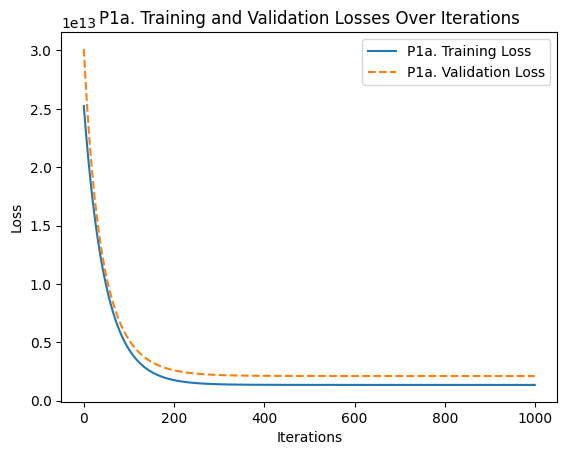

In [13]:
# Plot the training and validation losses
plt.plot(range(iterations), loss_train_a, label='P1a. Training Loss')
plt.plot(range(iterations), loss_eval_a, label='P1a. Validation Loss', linestyle='--')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('P1a. Training and Validation Losses Over Iterations')
plt.legend()
plt.show()

In [14]:
# Problem 1b
x_b = data[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
            'guestroom', 'basement', 'hotwaterheating',
            'airconditioning', 'parking', 'prefarea']]
y_b = data['price']

# Converting categorical variables to numeric using pd.get_dummies
x_b = pd.get_dummies(x_b, drop_first=True)

x_train_b, x_eval_b, y_train_b, y_eval_b = train_test_split(x_b, y_b, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_b_scaled = scaler.fit_transform(x_train_b)
x_eval_b_scaled = scaler.transform(x_eval_b)

In [15]:
# Set parameters for gradient descent
learning_rate = 0.01
iterations = 1000

# Training the gradient descent models
theta_train_b, b_train_b, loss_train_b = gradient_descent(x_train_b_scaled, y_train_b, learning_rate, iterations)
theta_eval_b, b_eval_b, loss_eval_b = gradient_descent(x_eval_b_scaled, y_eval_b, learning_rate, iterations)

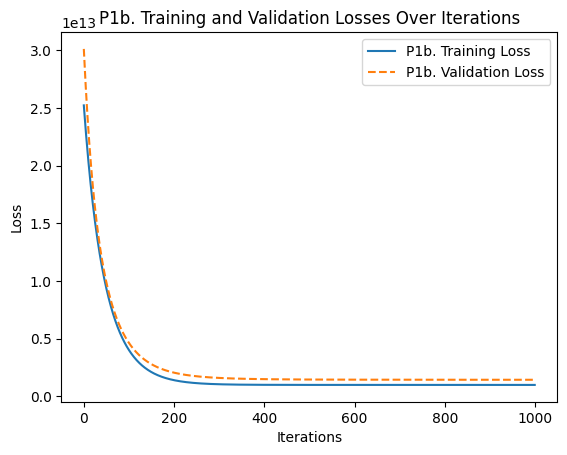

In [16]:
plt.plot(range(iterations), loss_train_b, label='P1b. Training Loss')
plt.plot(range(iterations), loss_eval_b, label='P1b. Validation Loss', linestyle='--')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('P1b. Training and Validation Losses Over Iterations')
plt.legend()
plt.show()

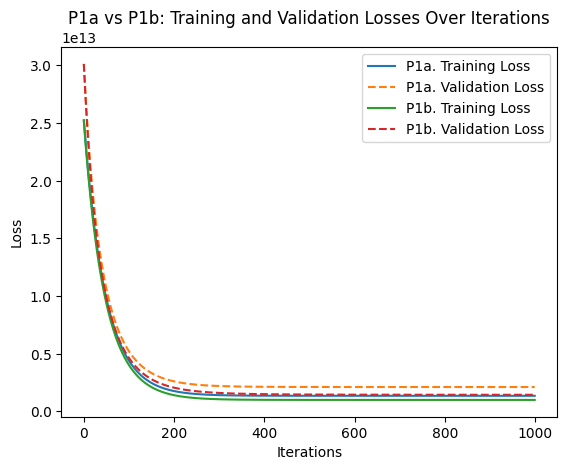

In [17]:
plt.plot(range(iterations), loss_train_a, label='P1a. Training Loss')
plt.plot(range(iterations), loss_eval_a, label='P1a. Validation Loss', linestyle='--')
plt.plot(range(iterations), loss_train_b, label='P1b. Training Loss')
plt.plot(range(iterations), loss_eval_b, label='P1b. Validation Loss', linestyle='--')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('P1a vs P1b: Training and Validation Losses Over Iterations')
plt.legend()
plt.show()

In [18]:
# Problem 2a
input_variables_a = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
x_a = data[input_variables_a]

In [19]:
# Function to split and preprocess logic
def preprocess_data_a(scaling_type='standardization', variable=x_a):
  x = variable
  y = data['price']

  # Splitting data into 80% and 20% split between training and evaluation
  x_train, x_eval, y_train, y_eval = train_test_split(x, y, test_size=0.2,random_state=42)

  if scaling_type == 'standardization':
    scaler = StandardScaler()
  elif scaling_type == 'normalization':
    scaler = MinMaxScaler()

  x_train_scaled = scaler.fit_transform(x_train)
  x_eval_scaled = scaler.transform(x_eval)

  return x_train_scaled, x_eval_scaled, y_train, y_eval

In [20]:
# Function to train model with preprocessing
def train_model_with_preprocessing_a(scaling_type, learning_rate, iterations):
  x_trained_scaled, x_eval_scaled, y_train, y_eval = preprocess_data_a(scaling_type=scaling_type)

  theta, b, losses_train = gradient_descent(x_trained_scaled, y_train, learning_rate, iterations)

  losses_eval = []
  for i in range(iterations):
    y_pred_eval_iter = np.dot(x_eval_scaled, theta) + b
    loss_eval = (1/(2*x_eval_scaled.shape[0])) * np.sum((y_pred_eval_iter - y_eval) ** 2)
    losses_eval.append(loss_eval)

  return theta, b, losses_train, losses_eval

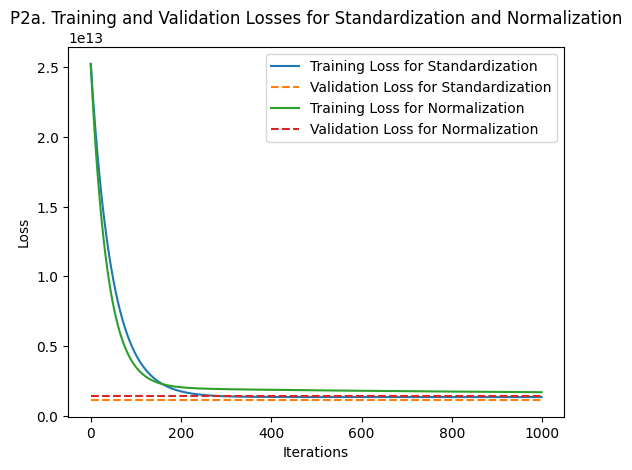

In [21]:
# Set parameters
learning_rate = 0.01
iterations = 1000

# Input standardization
theta_std_a, b_std_a, losses_train_std_a, losses_eval_std_a = train_model_with_preprocessing_a('standardization', learning_rate, iterations)

# Input normalization
theta_norm_a, b_norm_a, losses_train_norm_a, losses_eval_norm_a = train_model_with_preprocessing_a('normalization', learning_rate, iterations)

# Plot the training vs validation losses for input standardization and input normalization
plt.plot(range(iterations), losses_train_std_a, label='Training Loss for Standardization')
plt.plot(range(iterations), losses_eval_std_a, label='Validation Loss for Standardization', linestyle='--')

plt.plot(range(iterations), losses_train_norm_a, label='Training Loss for Normalization')
plt.plot(range(iterations), losses_eval_norm_a, label='Validation Loss for Normalization', linestyle='--')

plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('P2a. Training and Validation Losses for Standardization and Normalization')
plt.legend()
plt.show()

In [22]:
# Problem 2b
input_variables_b = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
                     'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
                     'parking', 'prefarea']
# Converting categorical variables to numeric using pd.get_dummies
x_b = pd.get_dummies(data[input_variables_b], drop_first=True)

In [23]:
# Function to split and preprocess logic
def preprocess_data_b(scaling_type='standardization', variable=x_b):
  x = variable
  y = data['price']

  # Splitting data into 80% and 20% split between training and evaluation
  x_train, x_eval, y_train, y_eval = train_test_split(x, y, test_size=0.2,random_state=42)

  if scaling_type == 'standardization':
    scaler = StandardScaler()
  elif scaling_type == 'normalization':
    scaler = MinMaxScaler()

  x_train_scaled = scaler.fit_transform(x_train)
  x_eval_scaled = scaler.transform(x_eval)

  return x_train_scaled, x_eval_scaled, y_train, y_eval

In [24]:
# Function to train model with preprocessing
def train_model_with_preprocessing_b(scaling_type, learning_rate, iterations):
  x_trained_scaled, x_eval_scaled, y_train, y_eval = preprocess_data_b(scaling_type=scaling_type)

  theta, b, losses_train = gradient_descent(x_trained_scaled, y_train, learning_rate, iterations)

  losses_eval = []
  for i in range(iterations):
    y_pred_eval_iter = np.dot(x_eval_scaled, theta) + b
    loss_eval = (1/(2*x_eval_scaled.shape[0])) * np.sum((y_pred_eval_iter - y_eval) ** 2)
    losses_eval.append(loss_eval)

  return theta, b, losses_train, losses_eval

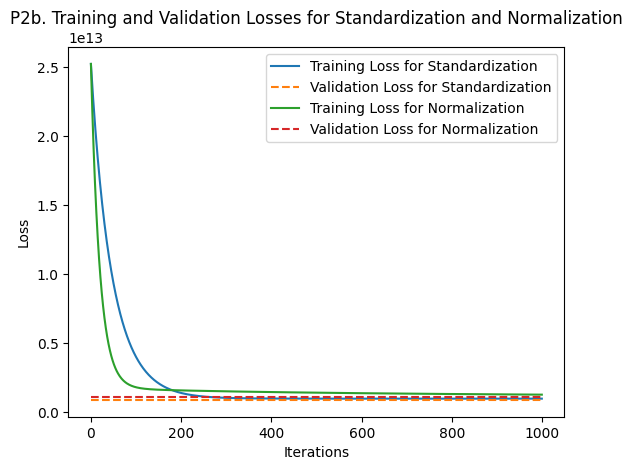

In [25]:
# Set parameters
learning_rate = 0.01
iterations = 1000

# Input standardization
theta_std_b, b_std_b, losses_train_std_b, losses_eval_std_b = train_model_with_preprocessing_b('standardization', learning_rate, iterations)

# Input normalization
theta_norm_b, b_norm_b, losses_train_norm_b, losses_eval_norm_b = train_model_with_preprocessing_b('normalization', learning_rate, iterations)

# Plot the training vs validation losses for input standardization and input normalization
plt.plot(range(iterations), losses_train_std_b, label='Training Loss for Standardization')
plt.plot(range(iterations), losses_eval_std_b, label='Validation Loss for Standardization', linestyle='--')

plt.plot(range(iterations), losses_train_norm_b, label='Training Loss for Normalization')
plt.plot(range(iterations), losses_eval_norm_b, label='Validation Loss for Normalization', linestyle='--')

plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('P2b. Training and Validation Losses for Standardization and Normalization')
plt.legend()
plt.show()

In [29]:
# Function for gradient descent with L2 regularization
def gradient_descent_with_regularization(x, y, learning_rate, iterations, lambda_reg=0.1):
  m = x.shape[0]
  n = x.shape[1]
  theta = np.zeros(n) # Initialize theta to zero
  b = 0 # Intercept
  losses = []

  for i in range(iterations):
    # Prediction for y
    y_prediction = np.dot(x, theta) + b

    # Calculate Mean Squared Error (loss)
    loss = (1/(2*m)) * (np.sum((y_prediction - y) ** 2) + lambda_reg * np.sum(theta ** 2))
    losses.append(loss)

    # Gradient descent update rules
    d_theta = (1/m) * (np.dot(x.T, (y_prediction - y)) + lambda_reg * theta)
    d_b = (1/m) * np.sum(y_prediction - y)

    # Update theta and b
    theta -= learning_rate * d_theta
    b -= learning_rate * d_b

  return theta, b, losses

In [30]:
# Problem 3a
# Function to train model with regularization
def train_model_with_regularization_a(scaling_type, learning_rate, iterations, lambda_reg):
  x_trained_scaled, x_eval_scaled, y_train, y_eval = preprocess_data_a(scaling_type=scaling_type)

  theta, b, losses_train = gradient_descent_with_regularization(x_trained_scaled, y_train, learning_rate, iterations, lambda_reg)

  losses_eval = []
  for i in range(iterations):
    y_pred_eval_iter = np.dot(x_eval_scaled, theta) + b
    loss_eval = (1/(2*x_eval_scaled.shape[0])) * np.sum((y_pred_eval_iter - y_eval) ** 2)
    losses_eval.append(loss_eval)

  return theta, b, losses_train, losses_eval

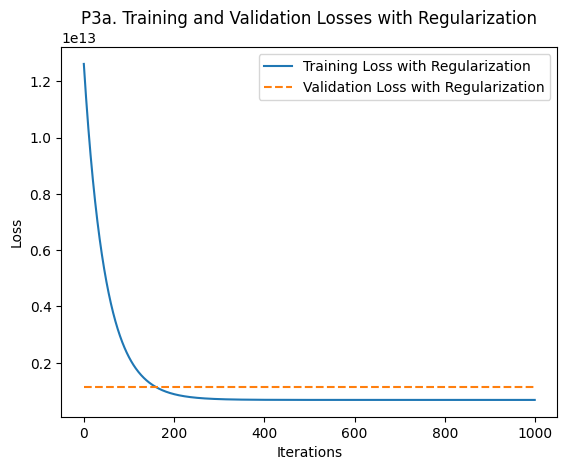

In [28]:
# Set parameters
learning_rate = 0.01
iterations = 1000
lambda_reg = 0.1

# Train the model with regularization using standardization
theta_reg_a, intercept_reg_a, losses_train_reg_a, losses_eval_reg_a = train_model_with_regularization_a('standardization', learning_rate, iterations, lambda_reg)

# Plot the training and validation losses
plt.plot(range(iterations), losses_train_reg_a, label='Training Loss with Regularization')
plt.plot(range(iterations), losses_eval_reg_a, label='Validation Loss with Regularization', linestyle='--')

plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('P3a. Training and Validation Losses with Regularization')
plt.legend()
plt.show()

In [31]:
# Problem 3b
# Function to train model with regularization
def train_model_with_regularization_b(scaling_type, learning_rate, iterations, lambda_reg):
  x_trained_scaled, x_eval_scaled, y_train, y_eval = preprocess_data_b(scaling_type=scaling_type)

  theta, b, losses_train = gradient_descent_with_regularization(x_trained_scaled, y_train, learning_rate, iterations, lambda_reg)

  losses_eval = []
  for i in range(iterations):
    y_pred_eval_iter = np.dot(x_eval_scaled, theta) + b
    loss_eval = (1/(2*x_eval_scaled.shape[0])) * np.sum((y_pred_eval_iter - y_eval) ** 2)
    losses_eval.append(loss_eval)

  return theta, b, losses_train, losses_eval

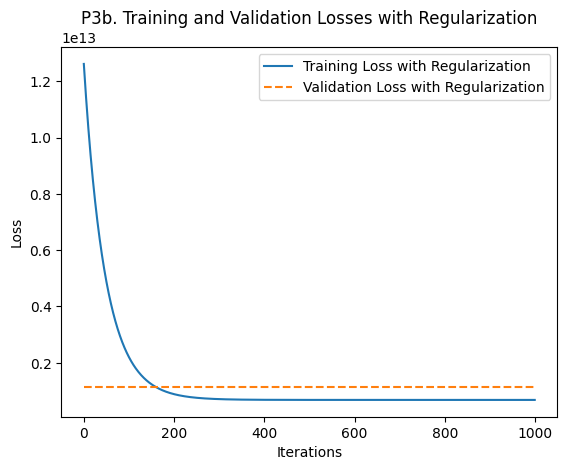

In [34]:
# Set parameters
learning_rate = 0.01
iterations = 1000
lambda_reg = 0.1

# Train the model with regularization using standardization
theta_reg_b, intercept_reg_b, losses_train_reg_b, losses_eval_reg_b = train_model_with_regularization_b('standardization', learning_rate, iterations, lambda_reg)

# Plot the training and validation losses
plt.plot(range(iterations), losses_train_reg_a, label='Training Loss with Regularization')
plt.plot(range(iterations), losses_eval_reg_a, label='Validation Loss with Regularization', linestyle='--')

plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('P3b. Training and Validation Losses with Regularization')
plt.legend()
plt.show()